# ENSEMBLE-TECHNIQUE(MAX-VOTING)

Loding required dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data=pd.read_csv('test_frame.csv')

In [30]:
data.shape

(100000, 12)

In [31]:
data.head()

,Unnamed: 0,vitals_datetime,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,patient_id,machine_id,Coded
0,0,2020-08-01 00:00:01+00:00,87.0,11.0,99.0,113.0,127.0,55.0,75.0,1824098,6BTELE-31,0.0
1,1,2020-08-01 00:00:06+00:00,49.0,0.0,100.0,71.0,139.0,65.0,112.0,151310,6WNTX-16,0.0
2,2,2020-08-01 00:00:14+00:00,105.0,20.0,95.0,106.0,86.0,35.0,49.0,1823860,MICU-02,0.0
3,3,2020-08-01 00:00:23+00:00,82.0,23.0,100.0,82.0,187.0,112.0,141.0,1824302,MICU-06,0.0
4,4,2020-08-01 00:00:32+00:00,84.0,18.0,99.0,84.0,124.0,75.0,91.0,131903,MICU-05,0.0


# Finding if any null values exists

In [32]:
data.isnull().sum()

Unnamed: 0                      0
vitals_datetime                 0
heart_rate                      0
respiration_over_impedence      0
spirometry_oxygen_saturation    0
pulse                           0
blood_pressure_systolic         0
blood_pressure_diastolic        0
blood_pressure_average          0
patient_id                      0
machine_id                      0
Coded                           0
dtype: int64

In [33]:
data.drop_duplicates(subset='patient_id', keep='first', inplace=True)

# Dropping categorical variables

In [47]:
data.describe()

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,Coded
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,82.880952,19.738095,97.468254,81.563492,130.285714,72.698413,92.190476,0.015873
std,21.326268,8.984590,3.738848,20.672492,26.844100,16.256578,20.746745,0.125483
min,31.000000,0.000000,76.000000,33.000000,78.000000,35.000000,49.000000,0.000000
25%,68.250000,16.000000,96.000000,68.000000,110.750000,60.000000,78.000000,0.000000
50%,81.000000,19.000000,99.000000,76.000000,125.500000,72.500000,90.000000,0.000000
75%,94.000000,23.000000,100.000000,96.000000,151.750000,84.750000,104.000000,0.000000
max,156.000000,80.000000,100.000000,152.000000,204.000000,112.000000,172.000000,1.000000


In [48]:
data.dtypes

heart_rate                      float64
respiration_over_impedence      float64
spirometry_oxygen_saturation    float64
pulse                           float64
blood_pressure_systolic         float64
blood_pressure_diastolic        float64
blood_pressure_average          float64
Coded                           float64
dtype: object

In [34]:
data.drop(['Unnamed: 0','vitals_datetime','machine_id','patient_id'],axis=1,inplace=True)

In [35]:
data.head()

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,Coded
0,87.0,11.0,99.0,113.0,127.0,55.0,75.0,0.0
1,49.0,0.0,100.0,71.0,139.0,65.0,112.0,0.0
2,105.0,20.0,95.0,106.0,86.0,35.0,49.0,0.0
3,82.0,23.0,100.0,82.0,187.0,112.0,141.0,0.0
4,84.0,18.0,99.0,84.0,124.0,75.0,91.0,0.0


# seperating independent and dependent variables

In [36]:


x = data.drop(['Coded'], axis=1)
y = data['Coded']

# Dividing given data into train test

In [37]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 101, stratify=y)

# Applying various classification models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# LogisticRegression

In [39]:
model1 = LogisticRegression()
model1.fit(train_x,train_y)
pred1=model1.predict(valid_x)
pred1[:20], model1.score(valid_x, valid_y)

C:\Users\yadda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), 0.9375)

# KNN-Classification

In [40]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
pred2=model2.predict(valid_x)
pred2[:20], model2.score(valid_x, valid_y)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), 0.96875)

# DecisionTree

In [41]:
model3 = DecisionTreeClassifier(max_depth=7)
model3.fit(train_x,train_y)
pred3=model3.predict(valid_x)
pred3[:20], model3.score(valid_x, valid_y)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), 0.90625)

# For max voting we use statistical mode as operator

In [42]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(valid_x)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [43]:
from sklearn.metrics import accuracy_score

# Final  Accuracy based on max voting

In [44]:
print("Final accuracy of model based on max voting:\n",accuracy_score(valid_y, final_pred))

Final accuracy of model based on max voting:
 0.9375


# Final accuracy of all models

In [49]:
print("LogisticRegression Accuracy:\n",accuracy_score(valid_y, pred1))
print("Knn-classification Accuracy:\n",accuracy_score(valid_y, pred2))
print("DecisionTree accuracy:\n",accuracy_score(valid_y, pred3))

LogisticRegression Accuracy:
 0.9375
Knn-classification Accuracy:
 0.96875
DecisionTree accuracy:
 0.90625


# Comparison plot of accuracy 

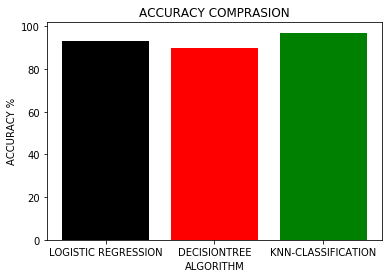

In [50]:
height = [93,90,97]
bars = ('LOGISTIC REGRESSION','DECISIONTREE','KNN-CLASSIFICATION')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['black', 'red', 'green'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

plt.title("ACCURACY COMPRASION")
plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY %")

# Show graph
plt.show()